# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [38]:
# All required libraries are imported here for you.
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Load the dataset
crops = pd.read_csv("soil_measures.csv")
crops.dtypes
crops.columns

# Write your code here

Index(['N', 'P', 'K', 'ph', 'crop'], dtype='object')

In [39]:

crops.dtypes

crops.columns

Index(['N', 'P', 'K', 'ph', 'crop'], dtype='object')

In [40]:
crops.isna().sum().sort_values()

x = crops.drop('crop', axis=1).values
y = crops['crop'].values

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)


In [42]:
c_values = np.linspace(0.001, 1, 20)

results = []

# Loop through different C values
for c in c_values:
    logreg = LogisticRegression(C=c, max_iter=1000)  # Increase max_iter if needed
    logreg.fit(x_train, y_train)
    score = logreg.score(x_test, y_test)
    results.append((c, score))

# Convert results to DataFrame for easy viewing
import pandas as pd
results_df = pd.DataFrame(results, columns=['C', 'Accuracy'])
print(results_df)

           C  Accuracy
0   0.001000  0.625000
1   0.053579  0.663636
2   0.106158  0.611364
3   0.158737  0.629545
4   0.211316  0.627273
5   0.263895  0.650000
6   0.316474  0.615909
7   0.369053  0.611364
8   0.421632  0.620455
9   0.474211  0.622727
10  0.526789  0.618182
11  0.579368  0.625000
12  0.631947  0.611364
13  0.684526  0.613636
14  0.737105  0.615909
15  0.789684  0.613636
16  0.842263  0.606818
17  0.894842  0.618182
18  0.947421  0.613636
19  1.000000  0.609091


In [43]:
# Find the best C value
best_c, best_accuracy = max(results, key=lambda x: x[1])
print(f"Best C value: {best_c}, Accuracy: {best_accuracy}")


Best C value: 0.05357894736842105, Accuracy: 0.6636363636363637


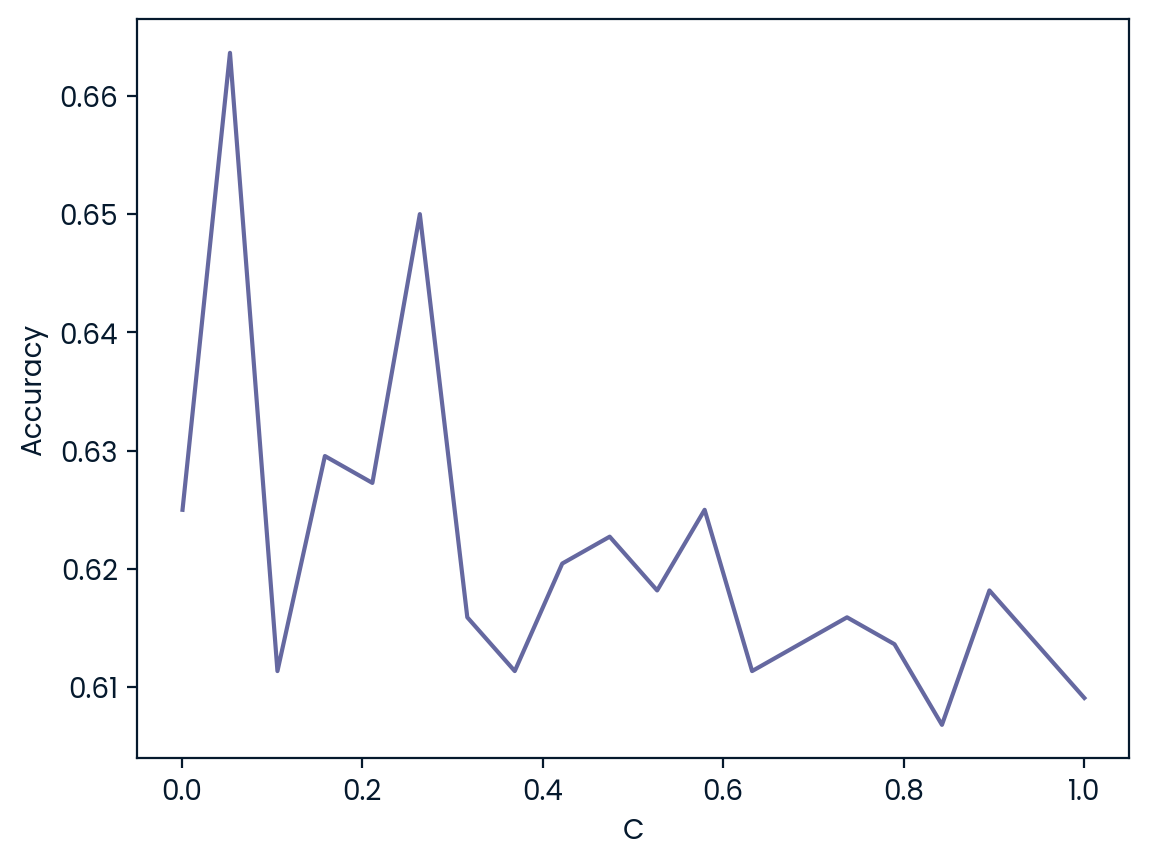

In [44]:
import matplotlib.pyplot as plt 
plt.plot(results_df['C'], results_df['Accuracy'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

In [45]:
# Train the model with the best C value
best_logreg = LogisticRegression(C=best_c, max_iter=100)
best_logreg.fit(x_train, y_train)

# Predict on the test set
y_pred = best_logreg.predict(x_test)

# Compute the confusion matrix
print(confusion_matrix(y_test, y_pred))


[[13  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  1  5  0  0  1  3  0  0  0  1  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  8  0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0 19  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  9  0  0  1  0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0  3  2  0  0  2  0  0  0  0 10  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  3 11  0  0  0  1  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  3  0  0  0  1  0  0  0  8  0  0  0  0  1  0  1  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  1  3 17  0  2  0  2  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  2

Now we seem to gave finished but to get the best feature that predicts the crop to be planted we will continue as the following:

In [46]:

# Split into feature and target sets
X = crops.drop(columns="crop")
y = crops["crop"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Create a dictionary to store the model performance for each feature
feature_performance = {}

# Train a logistic regression model for each feature
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(multi_class="multinomial")
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    
    # Calculate F1 score, the harmonic mean of precision and recall
    # Could also use balanced_accuracy_score
    f1 = metrics.f1_score(y_test, y_pred, average="weighted")
    
    # Add feature-f1 score pairs to the dictionary
    feature_performance[feature] = f1
    print(f"F1-score for {feature}: {f1}")

# K produced the best F1 score
# Store in best_predictive_feature dictionary
best_predictive_feature = {"K": feature_performance["K"]}
best_predictive_feature

F1-score for N: 0.09149868209906838
F1-score for P: 0.14761942909728204
F1-score for K: 0.23896974566001802
F1-score for ph: 0.04532731061152114


{'K': 0.23896974566001802}